In [10]:
headers = ['x' + ('00' + str(i))[-3:] for i in range(785)]  # 785 data columns
# 'x000 (first column is y target label, value 0-9), x001, x002, etc there are 28x28=784 pixels columns, 

import pandas as pd
import os

filepath = f'../data/mnist_train.csv'

df = pd.read_csv(filepath, names=headers)

In [11]:
# Check the shape and data type, make sure everything looks fine.
print(df.shape, df.dtypes)
df.head(5)

(60000, 785) x000    int64
x001    int64
x002    int64
x003    int64
x004    int64
        ...  
x780    int64
x781    int64
x782    int64
x783    int64
x784    int64
Length: 785, dtype: object


,x000,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x775,x776,x777,x778,x779,x780,x781,x782,x783,x784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# ## STEP 2 (optional): Preparing the data
# If using all 60k observations takes forever in your 
# work, you can take some smaller random sample to try. 
# As it turns out, the rows of data are already randomized. 
# If you just take the first 10k rows or 8k, it might work okay. 
# 
# If we were to do some modeling (classifiers or regressions). we 
# would need to prepare for train-test split. Say 4:1. But for now 
# we'll just do clustering and PCA.
# 
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test= train_test_split(df.iloc[0:,1:], df["x000"], test_size=0.2, stratify=df["x000"],random_state=1)

# 
# If the latter modeling part does not run, check the X_train, X_test has the 
# right object type. Use the 8x8 pixel sample in class as a guide.

Text(0.5, 1.0, 'Last Digit')

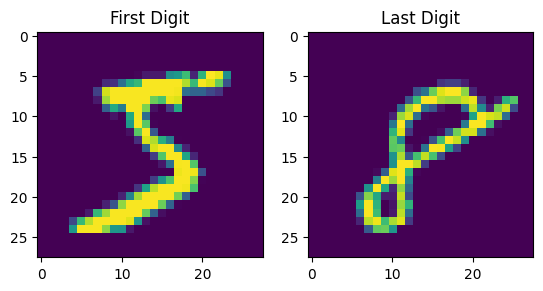

In [20]:
# ## STEP 3: View some samples 
# Plot the first and the last row of your train set, and see the image as we 
# did in class. Make sure the format is a 28x28 array for the plot to work.
# 
# What do they look like?
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
import matplotlib.pyplot as plt
d_first = df.iloc[0,1:].values.reshape(28,28)
d_last = df.iloc[-1,1:].values.reshape(28,28)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(d_first)
ax1.set_title('First Digit')
ax2.imshow(d_last)
ax2.set_title('Last Digit')

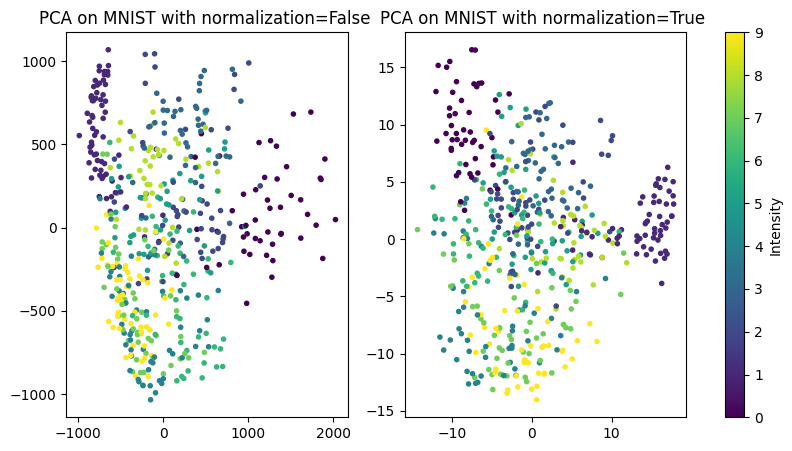

In [46]:
# ## STEP 4: Perform PCA and Kmeans on this dataset. 
# Explain your work and your findings. 
# For Kmeans, what number of clusters did you end up find it most 
# reasonble? How did you come up with that conclusion? 
# What does that mean here? 
# This is an open ended question. Please show your inquisitiveness 
# on an new exposure. 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
def pca_draw(df, n_sample=500):
    df = df.iloc[:n_sample,:]
    mnist = df.iloc[:,1:].values.reshape(-1, 28 * 28)
    nor_mnist = (mnist - mnist.mean(axis=1, keepdims=True)) / mnist.std(axis=1, keepdims=True)
    labels = df.iloc[:,0].values.reshape(-1, 1)
    transformed1 = pca.fit_transform(mnist)
    transformed2 = pca.fit_transform(nor_mnist)
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))
    im1 = ax1.scatter(transformed1[:, 0], transformed1[:, 1], c=labels, cmap='viridis', marker='.')
    im2 = ax2.scatter(transformed2[:, 0], transformed2[:, 1], c=labels, cmap='viridis', marker='.')
    ax1.set_title(f"PCA on MNIST with normalization=False ")
    ax2.set_title(f"PCA on MNIST with normalization=True ")
    bar = fig.colorbar(im1, ax=[ax1 , ax2])
    bar.set_label('Intensity')
    plt.show()
pca_draw(df)

In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# The silhouette score measures how similar a data point is to its own cluster (cohesion) compared to other clusters (separation).

pca = PCA(n_components=50)
mnist = df.iloc[:,1:].values.reshape(-1, 28 * 28)
nor_mnist = (mnist - mnist.mean(axis=1, keepdims=True)) / mnist.std(axis=1, keepdims=True)
labels = df.iloc[:,0].values.reshape(-1, 1)
X_pca = pca.fit_transform(nor_mnist)

In [59]:
n_cluster_range = range(2, 20)
silhouette_scores = []
for n in n_cluster_range:
    kmeans = KMeans(n_clusters=n, n_init=5, random_state=0).fit(X_pca)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_pca, labels)
    print(f'The average silhouette_score for {n} clusters is {silhouette_avg}')
    silhouette_scores.append(silhouette_avg)
best_score = max(silhouette_scores)
print(f"Based on Silhouette score, {silhouette_scores.index(best_score)} clusters in the optimal")

The average silhouette_score for 2 clusters is 0.07217250025354074
The average silhouette_score for 3 clusters is 0.08398884746589953
The average silhouette_score for 4 clusters is 0.09171926479783861
The average silhouette_score for 5 clusters is 0.09785960095296692
The average silhouette_score for 6 clusters is 0.10210468043177481
The average silhouette_score for 7 clusters is 0.10520542338523836
The average silhouette_score for 8 clusters is 0.10622483702906761
The average silhouette_score for 9 clusters is 0.1121521729322956
The average silhouette_score for 10 clusters is 0.11154388404165877
The average silhouette_score for 11 clusters is 0.11238667181446943
The average silhouette_score for 12 clusters is 0.1124005022675267
The average silhouette_score for 13 clusters is 0.11306366475320755
The average silhouette_score for 14 clusters is 0.10487940283389317
The average silhouette_score for 15 clusters is 0.1084569479548289
The average silhouette_score for 16 clusters is 0.107645763